<a href="https://colab.research.google.com/github/VINAY-GOPAL/EDA-and-hypothesis-testing-on-indian-logistic-company/blob/main/delhivery_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data is about the india's fastest-growing logistic company. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

# Problem statement:

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it


**Column Profiling:**

data - tells whether the data is testing or training data

trip_creation_time – Timestamp of trip creation

route_schedule_uuid – Unique Id for a particular route schedule

route_type – Transportation type

FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

Carting: Handling system consisting of small vehicles (carts)

trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

source_center - Source ID of trip origin

source_name - Source Name of trip origin

destination_cente – Destination ID

destination_name – Destination Name

od_start_time – Trip start time

od_end_time – Trip end time

start_scan_to_end_scan – Time taken to deliver from source to destination

is_cutoff – Unknown field

cutoff_factor – Unknown field

cutoff_timestamp – Unknown field

actual_distance_to_destination – Distance in Kms between source and destination warehouse

actual_time – Actual time taken to complete the delivery (Cumulative)

osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

factor – Unknown field

segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

segment_factor – Unknown field

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from statsmodels.graphics.gofplots import qqplot,qqplot_2samples

In [4]:
df = pd.read_csv("data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
df.shape

(144867, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [7]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [8]:
df.describe(include="object")

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


Checking for null values:

In [9]:
(df.isna().sum()/len(df)) * 100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

We have very few null values in source_name & destination_name so we can drop the data.                      

In [10]:
df = df[df["source_name"].notna()]
df = df[df["destination_name"].notna()]   #we are taking the rows which are not null

In [11]:
(df.isna().sum()/len(df)) * 100

data                              0.0
trip_creation_time                0.0
route_schedule_uuid               0.0
route_type                        0.0
trip_uuid                         0.0
source_center                     0.0
source_name                       0.0
destination_center                0.0
destination_name                  0.0
od_start_time                     0.0
od_end_time                       0.0
start_scan_to_end_scan            0.0
is_cutoff                         0.0
cutoff_factor                     0.0
cutoff_timestamp                  0.0
actual_distance_to_destination    0.0
actual_time                       0.0
osrm_time                         0.0
osrm_distance                     0.0
factor                            0.0
segment_actual_time               0.0
segment_osrm_time                 0.0
segment_osrm_distance             0.0
segment_factor                    0.0
dtype: float64

In [12]:
df.shape

(144316, 24)

In [13]:
# converting objects to date_columns
col_date = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
for i in col_date:
 df[i] = pd.to_datetime(df[i])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [15]:
# Checking for duplicates

df.duplicated().sum()

0

In [16]:
def counts(column_name):
  print(column_name, "value counts")
  print(df[f'{column_name}'].value_counts())
  print("\n")


In [17]:
obj_col = []
for col in df.columns:
  if df[col].dtype == 'O':
    obj_col.append(col)

In [18]:
obj_col   #columns whose dtype is object

['data',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name']

In [19]:
for col in obj_col:
  counts(col)      #value counts of columns whose dtype is object

data value counts
training    104632
test         39684
Name: data, dtype: int64


route_schedule_uuid value counts
thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    1812
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10    1608
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366    1605
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2    1285
thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d    1280
                                                       ... 
thanos::sroute:c6403e98-1ffa-49ed-bc55-5adcdc4ad39d       1
thanos::sroute:889b9cf5-da6a-48ce-b3bd-6983c8090164       1
thanos::sroute:d563d17e-2123-40a4-9eec-40018966caba       1
thanos::sroute:afb04bf4-7734-4526-8d66-63ed50bef88b       1
thanos::sroute:02447388-0297-4e63-9a71-3589741bd807       1
Name: route_schedule_uuid, Length: 1497, dtype: int64


route_type value counts
FTL        99132
Carting    45184
Name: route_type, dtype: int64


trip_uuid value counts
trip-153837029526866991    101
trip-153715938946690081

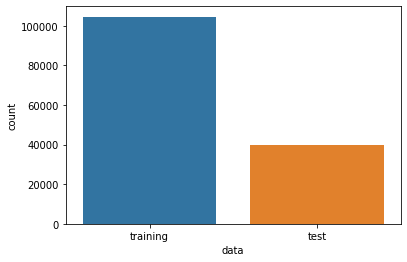

In [20]:
sns.countplot(x=df['data'])

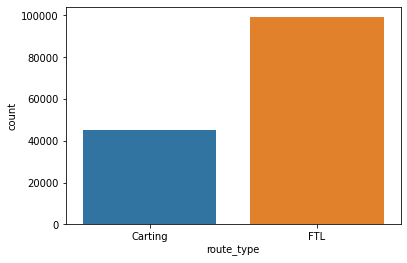

In [21]:
sns.countplot(x=df['route_type'])

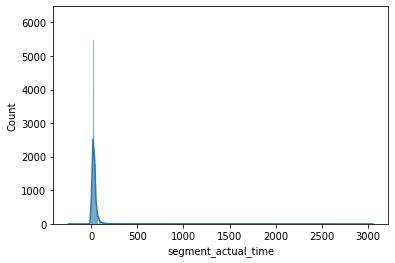

In [22]:
sns.histplot(df['segment_actual_time'],kde=True)

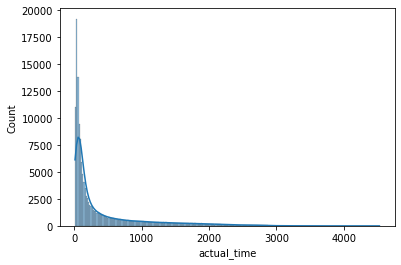

In [23]:
sns.histplot(df['actual_time'],kde=True)

# Preprocessing:

Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination). Now think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows?

In [24]:
df_sr_ds = df.groupby(["trip_uuid", "source_center", "destination_center"], as_index=False).agg(
    {'data': 'first', 'trip_creation_time': 'first', 'route_type': 'first', 'source_name': 'first', 'destination_name': 'last',
     'od_start_time':'first' , 'od_end_time': 'last', 
     'start_scan_to_end_scan': 'first', 'actual_time': np.max, 'osrm_time': np.max, 'segment_actual_time': np.sum, 
     'osrm_time': np.max, 'segment_osrm_time': np.sum, 'osrm_distance': np.max, 'segment_osrm_distance': np.sum, 'actual_distance_to_destination': np.max})

In [25]:
df_sr_ds[df_sr_ds['trip_uuid']=='trip-153741093647649320']

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination
10370,trip-153741093647649320,IND388121AAA,IND388620AAB,training,2018-09-20 02:35:36.476840,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,68.0,44.0,67.0,44.0,54.2181,49.4772,39.386040
10371,trip-153741093647649320,IND388620AAB,IND388320AAA,training,2018-09-20 02:35:36.476840,Carting,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,102.0,45.0,100.0,44.0,53.2334,53.2334,43.595802


In [26]:
df_sr_ds

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,732.0,349.0,728.0,534.0,446.5496,670.6205,383.759164
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,830.0,394.0,820.0,474.0,544.8027,649.8528,440.973689
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,47.0,26.0,46.0,26.0,28.1994,28.1995,24.644021
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,96.0,42.0,95.0,39.0,56.9116,55.9899,48.542890
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,611.0,212.0,608.0,231.0,281.2109,317.7408,242.309306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,test,2018-10-03 23:59:14.390954,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,51.0,41.0,49.0,42.0,42.5213,42.1431,33.627182
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,test,2018-10-03 23:59:14.390954,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,90.0,48.0,89.0,77.0,40.6080,78.5869,33.673835
26219,trip-153861115439069069,IND628801AAA,IND628204AAA,test,2018-10-03 23:59:14.390954,Carting,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,30.0,14.0,29.0,14.0,16.0185,16.0184,12.661945
26220,trip-153861118270144424,IND583119AAA,IND583101AAA,test,2018-10-03 23:59:42.701692,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,233.0,42.0,233.0,42.0,52.5303,52.5303,40.546740


In [27]:
df_sr_ds.shape

(26222, 18)

Let's sort based on od_start_time & trip uuid.

In [28]:
df_sr_ds.sort_values(['trip_uuid', 'od_start_time'])

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,830.0,394.0,820.0,474.0,544.8027,649.8528,440.973689
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,732.0,349.0,728.0,534.0,446.5496,670.6205,383.759164
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,96.0,42.0,95.0,39.0,56.9116,55.9899,48.542890
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,47.0,26.0,46.0,26.0,28.1994,28.1995,24.644021
5,trip-153671043369099517,IND562132AAA,IND000000ACB,training,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,2736.0,1529.0,2700.0,1710.0,2090.8743,2227.5270,1689.964663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,test,2018-10-03 23:59:14.390954,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,51.0,41.0,49.0,42.0,42.5213,42.1431,33.627182
26216,trip-153861115439069069,IND627657AAA,IND628613AAA,test,2018-10-03 23:59:14.390954,Carting,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),Peikulam_SriVnktpm_D (Tamil Nadu),2018-10-04 03:31:11.183797,2018-10-04 04:16:39.894872,45.0,33.0,31.0,32.0,30.0,25.7087,25.7087,17.373209
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,test,2018-10-03 23:59:14.390954,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,90.0,48.0,89.0,77.0,40.6080,78.5869,33.673835
26221,trip-153861118270144424,IND583201AAA,IND583119AAA,test,2018-10-03 23:59:42.701692,FTL,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,42.0,26.0,41.0,25.0,28.0484,28.0484,25.534793


In [29]:
df_t = df_sr_ds.sort_values(['trip_uuid', 'od_start_time']).groupby("trip_uuid", as_index=False).agg({
    'trip_creation_time': 'first',
    'route_type': 'first',
    'source_center': 'first',
    'destination_center': 'last',
    'source_name': 'first',
    'destination_name': 'last',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': np.sum,
    'actual_time': np.sum,
    'osrm_time': np.sum,
    'segment_actual_time': np.sum,
    'segment_osrm_time': np.sum,
    'osrm_distance': np.sum, 
    'segment_osrm_distance': np.sum,
    'actual_distance_to_destination': np.sum
    
})

In [35]:
df_t.head()

,trip_uuid,trip_creation_time,route_type,source_center,destination_center,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination
0,trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,1562.0,743.0,1548.0,1008.0,991.3523,1320.4733,824.732854
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,143.0,68.0,141.0,65.0,85.1110,84.1894,73.186911
2,trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,3347.0,1741.0,3308.0,1941.0,2372.0852,2545.2678,1932.273969
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,59.0,15.0,59.0,16.0,19.6800,19.8766,17.175274
4,trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,IND583101AAA,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,341.0,117.0,340.0,115.0,146.7918,146.7919,127.448500


In [31]:
df_t.shape

(14787, 17)

In [32]:
df_t['trip_uuid'].nunique()

14787

**Build some features to prepare the data for actual analysis. Extract features from the below fields:**



*   Destination Name: Split and extract features out of destination.
City-place-code (State)

*   Source Name: Split and extract features out of destination. City-place-code (State)


*   Trip_creation_time: Extract features like month, year and day etc


 







In [42]:
#Destination Name: Split and extract features out of destination.

import re

def split_dest(des_name):
    match = re.match(r"(.*) \((.*)\)", des_name)
    c_p_c = match.group(1)
    state = match.group(2)
    split_codes = c_p_c.rsplit('_', 2)
    if len(split_codes) == 3:
        city, place, code = split_codes
    if len(split_codes) == 2:
        city, place =  split_codes
        code = ""
    if len(split_codes) == 1:
        city = split_codes[0]
        place = ""
        code = ""
    return ",".join([city, place, code, state])

print(split_dest("Gurgaon_Bilaspur_HB (Haryana)"))

Gurgaon,Bilaspur,HB,Haryana


In [44]:
df_t[["des_city", "des_place", "des_code", "des_state"]] = df_t['destination_name'].apply(lambda x: split_dest(x)).str.split(",", expand=True)
df_t.head()

,trip_uuid,trip_creation_time,route_type,source_center,destination_center,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_distance,actual_distance_to_destination,city,place,code,state,des_city,des_place,des_code,des_state
0,trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,...,1320.4733,824.732854,Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,HB,Haryana
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,...,84.1894,73.186911,Chikblapur,ShntiSgr,D,Karnataka,Chikblapur,ShntiSgr,D,Karnataka
2,trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,...,2545.2678,1932.273969,Chandigarh,Mehmdpur,H,Punjab,Chandigarh,Mehmdpur,H,Punjab
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,...,19.8766,17.175274,Mumbai,MiraRd,IP,Maharashtra,Mumbai,MiraRd,IP,Maharashtra
4,trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,IND583101AAA,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,...,146.7919,127.448500,Bellary,Dc,,Karnataka,Bellary,Dc,,Karnataka


In [45]:
#Source Name: Split and extract features out of destination. City-place-code (State)

df_t[["sr_city", "sr_place", "sr_code", "sr_state"]] = df_t['source_name'].apply(lambda x: split_dest(x)).str.split(",", expand=True)
df_t.head()

,trip_uuid,trip_creation_time,route_type,source_center,destination_center,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,code,state,des_city,des_place,des_code,des_state,sr_city,sr_place,sr_code,sr_state
0,trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,...,HB,Haryana,Gurgaon,Bilaspur,HB,Haryana,Bhopal,Trnsport,H,Madhya Pradesh
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,...,D,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,Tumkur,Veersagr,I,Karnataka
2,trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,...,H,Punjab,Chandigarh,Mehmdpur,H,Punjab,Bangalore,Nelmngla,H,Karnataka
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,...,IP,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,Mumbai Hub,,,Maharashtra
4,trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,IND583101AAA,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,...,,Karnataka,Bellary,Dc,,Karnataka,Bellary,Dc,,Karnataka


In [46]:
#Trip_creation_time: Extract features like month, year and day etc

df_t["t_year"] = pd.DatetimeIndex(df_t["trip_creation_time"]).year
df_t['t_month'] = pd.DatetimeIndex(df_t["trip_creation_time"]).month
df_t['t_day'] = pd.DatetimeIndex(df_t["trip_creation_time"]).day

In [47]:
df_t.head()

,trip_uuid,trip_creation_time,route_type,source_center,destination_center,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,des_place,des_code,des_state,sr_city,sr_place,sr_code,sr_state,t_year,t_month,t_day
0,trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,...,Bilaspur,HB,Haryana,Bhopal,Trnsport,H,Madhya Pradesh,2018,9,12
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,...,ShntiSgr,D,Karnataka,Tumkur,Veersagr,I,Karnataka,2018,9,12
2,trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,...,Mehmdpur,H,Punjab,Bangalore,Nelmngla,H,Karnataka,2018,9,12
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,...,MiraRd,IP,Maharashtra,Mumbai Hub,,,Maharashtra,2018,9,12
4,trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,IND583101AAA,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,...,Dc,,Karnataka,Bellary,Dc,,Karnataka,2018,9,12


#Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required

In [48]:


df_t['duration_of_od_in_min'] = (df_t['od_end_time'] - df_t['od_start_time']).dt.seconds/60
df_t.head()

,trip_uuid,trip_creation_time,route_type,source_center,destination_center,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,des_code,des_state,sr_city,sr_place,sr_code,sr_state,t_year,t_month,t_day,duration_of_od_in_min
0,trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,...,HB,Haryana,Bhopal,Trnsport,H,Madhya Pradesh,2018,9,12,820.100000
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,...,D,Karnataka,Tumkur,Veersagr,I,Karnataka,2018,9,12,181.600000
2,trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,...,H,Punjab,Bangalore,Nelmngla,H,Karnataka,2018,9,12,1054.350000
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,...,IP,Maharashtra,Mumbai Hub,,,Maharashtra,2018,9,12,100.483333
4,trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,IND583101AAA,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,...,,Karnataka,Bellary,Dc,,Karnataka,2018,9,12,718.333333


In [51]:
#Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

a = df_t['start_scan_to_end_scan'].values
len(a)

14787

In [52]:
b = df_t['duration_of_od_in_min'].values
len(b)

14787

We have enough data. Data from a normal distribution is ensured via CLT. We'll use a t-test with two independent samples.

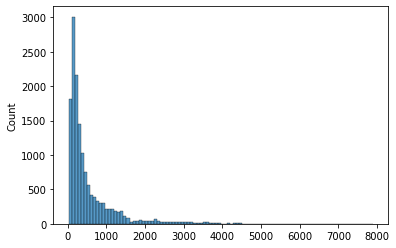

In [53]:
sns.histplot(a, bins=100)

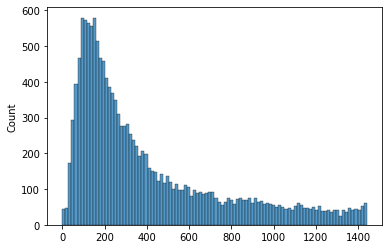

In [54]:
sns.histplot(b, bins=100)

H0: There is no difference between start_scan_to_end_scan and od_duration_in_sec.

Ha: There is a difference between start_scan_to_end_scan and od_duration_in_sec.

In [55]:
ttest_ind(a, b)

Ttest_indResult(statistic=20.60989437048805, pvalue=1.020848567684709e-93)

p-value is very small. So, we can reject null hypothesis

There is a difference between start_scan_to_end_scan and od_duration_in_sec.

H0: mean of start_scan_to_end_scan is smaller than mean of od_duration_in_sec

Ha: mean of start_scan_to_end_scan is greater than mean of od_duration_in_sec

In [58]:
ttest_ind(a, b, alternative='less')

Ttest_indResult(statistic=20.60989437048805, pvalue=1.0)


As p-value is high, we fail to reject null hypothesis.

Mean of start_scan_to_end_scan is smaller than mean of od_duration_in_sec

H0: mean of start_scan_to_end_scan is greater than mean of od_duration_in_sec

Ha: mean of start_scan_to_end_scan is smaller than mean of od_duration_in_sec

In [59]:
ttest_ind(a, b, alternative='greater')

Ttest_indResult(statistic=20.60989437048805, pvalue=5.104242838423545e-94)


As p-value is low, we reject null hypothesis.

mean of start_scan_to_end_scan is smaller than mean of od_duration_in_sec

# Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)



In [60]:
df_t['actual_time'].values


array([1562.,  143., 3347., ...,  282.,  264.,  275.])

In [61]:
df_t['osrm_time'].values

array([ 743.,   68., 1741., ...,   54.,  184.,   68.])

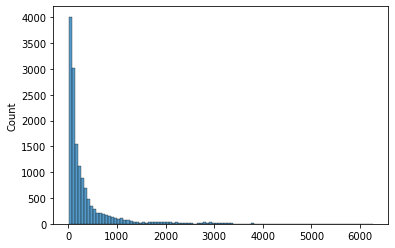

In [62]:
sns.histplot(df_t['actual_time'].values, bins=100)

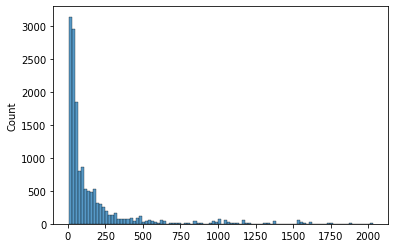

In [63]:
sns.histplot(df_t['osrm_time'].values, bins=100)

H0: Mean of actual_time and Mean of osrm_time are equal

Ha: Mean of actual_time and Mean of osrm_time are not equal

In [64]:
ttest_ind(df_t['actual_time'].values, df_t['osrm_time'].values)

Ttest_indResult(statistic=37.92331945613998, pvalue=2.4718713729605103e-307)

As p=value is very small, we can reject null hypothesis.

Mean of actual_time and Mean of osrm_time are not equal

H0: Mean of actual_time is less than mean of osrm_time

Ha: Mean of actual_time is not less than mean of osrm_time

In [65]:
ttest_ind(df_t['actual_time'].values, df_t['osrm_time'].values,alternative='less')

Ttest_indResult(statistic=37.92331945613998, pvalue=1.0)

As p-value is high, we fail to reject null hypothesis.

Mean of actual_time is less than mean of osrm_time

H0: Mean of actual_time is greater than mean of osrm_time

Ha: Mean of actual_time is not greater than mean of osrm_time

In [66]:
ttest_ind(df_t['actual_time'].values, df_t['osrm_time'].values,alternative='greater')

Ttest_indResult(statistic=37.92331945613998, pvalue=1.2359356864802551e-307)

As p=value is very small, we can reject null hypothesis.

 Mean of actual_time is not greater than mean of osrm_time

#Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [67]:
df_t['actual_time'].values

array([1562.,  143., 3347., ...,  282.,  264.,  275.])

In [68]:
df_t['segment_actual_time'].values

array([1548.,  141., 3308., ...,  281.,  258.,  274.])

H0: Mean of actual_time is equal to mean of segment_actual times 

Ha: Mean of actual_time is not equal to mean of segment_actual times

In [69]:
ttest_ind(df_t['actual_time'].values,df_t['segment_actual_time'].values)

Ttest_indResult(statistic=0.499475764573994, pvalue=0.6174479719707524)

As pvalue is greater than 0.05, we fail to reject null hypothesis.

Mean of actual_time is equal to mean of segment_actual times

In [70]:
np.mean(df_t['actual_time']), np.mean(df_t['segment_actual_time']) 

(356.30601203760057, 353.0591735984311)

#Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [72]:
df_t["osrm_distance"].values

array([ 991.3523,   85.111 , 2372.0852, ...,   63.2841,  177.6635,
         80.5787])

In [73]:
df_t["segment_osrm_distance"].values

array([1320.4733,   84.1894, 2545.2678, ...,  104.8866,  223.5324,
         80.5787])

H0: Mean of osrm_distance is equal to mean of segment_osrm_distance 

Ha: Mean of osrm_distance is not equal to mean of segment_osrm_distance

In [74]:
ttest_ind(df_t["osrm_distance"].values,df_t["segment_osrm_distance"].values)

Ttest_indResult(statistic=-3.937420853623222, pvalue=8.255072509709287e-05)

As pvalue is very less, we reject the null hypothesis.

Mean of osrm_distance is not equal to mean of segment_osrm_distance

H0: Mean of osrm_distance is less than mean of segment_osrm_distance

Ha: Mean of osrm_distance is not less than mean of segment_osrm_distance

In [78]:
ttest_ind(df_t["osrm_distance"].values,df_t["segment_osrm_distance"].values, alternative = 'greater')

Ttest_indResult(statistic=-3.937420853623222, pvalue=0.9999587246374514)

As pvalue is very high, we fail to reject null hypothesis.

Mean of osrm_distance is less than mean of segment_osrm_distance

H0: Mean of osrm_distance is greater than mean of segment_osrm_distance

Ha: Mean of osrm_distance is not greater than mean of segment_osrm_distance

In [79]:
ttest_ind(df_t["osrm_distance"].values,df_t["segment_osrm_distance"].values, alternative = 'less')

Ttest_indResult(statistic=-3.937420853623222, pvalue=4.1275362548546435e-05)

As pvalue is very less, we reject null hypothesis.

Mean of osrm_distance is not greater than mean of segment_osrm_distance

In [77]:
np.mean(df_t["osrm_distance"]),np.mean(df_t["segment_osrm_distance"])

(204.63757452492052, 222.7054664434977)

#Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [81]:
df_t['osrm_time'].values

array([ 743.,   68., 1741., ...,   54.,  184.,   68.])

In [82]:
df_t['segment_osrm_time'].values

array([1008.,   65., 1941., ...,   88.,  221.,   67.])

In [83]:
np.mean(df_t['osrm_time'].values),np.mean(df_t['segment_osrm_time'].values)

(161.669574626361, 180.5115980252925)

H0: Mean of osrm_time is equal to mean of segment_osrm_time

Ha: Mean of osrm_time is not equal to mean of segment_osrm_time

In [84]:
ttest_ind(df_t['osrm_time'].values,df_t['segment_osrm_time'].values)

Ttest_indResult(statistic=-5.505014892530727, pvalue=3.7220036379152134e-08)

As pvalue is very less, we reject null hypothesis.

Mean of osrm_time is not equal to mean of segment_osrm_time

H0: Mean of osrm_time is less than mean of segment_osrm_time

Ha: Mean of osrm_time is not less than mean of segment_osrm_time

In [85]:
ttest_ind(df_t['osrm_time'].values,df_t['segment_osrm_time'].values,alternative='greater')

Ttest_indResult(statistic=-5.505014892530727, pvalue=0.9999999813899818)

As pvalue is very high, we fail to reject null hypothesis.

Mean of osrm_time is less than mean of segment_osrm_time

H0: Mean of osrm_time is greater than mean of segment_osrm_time

Ha: Mean of osrm_time is not greater than mean of segment_osrm_time

In [86]:
ttest_ind(df_t['osrm_time'].values,df_t['segment_osrm_time'].values,alternative='less')

Ttest_indResult(statistic=-5.505014892530727, pvalue=1.8610018189576067e-08)

As pvalue is very less, we reject null hypothesis.

Mean of osrm_time is not greater than mean of segment_osrm_time

#Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [90]:
num_columns = df_t.columns[(df_t.dtypes=='float64')]
num_columns

Index(['start_scan_to_end_scan', 'actual_time', 'osrm_time',
       'segment_actual_time', 'segment_osrm_time', 'osrm_distance',
       'segment_osrm_distance', 'actual_distance_to_destination',
       'duration_of_od_in_min'],
      dtype='object')

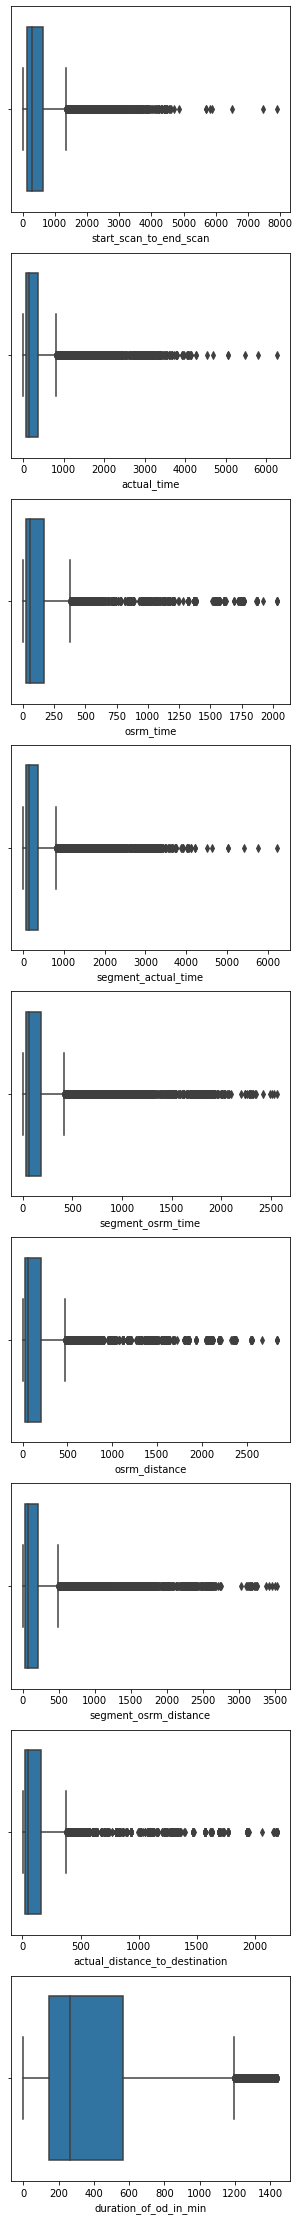

In [91]:
def box_plot(num_columns):  
  fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(5,40))
  for idx, col in enumerate(list(num_columns)):
      sns.boxplot(x=df_t[col], ax=axes[idx])

box_plot(num_columns)

#Handle the outliers using the IQR method.

In [94]:
for col in list(num_columns):
    print("\n")
    print("### Column Name: ", col)
    values = np.sort(df_t[col])
    p_25 = np.percentile(values, 25).round(2)
    p_75 = np.percentile(values, 75).round(2)
    print("25 th Percentile: ", p_25)
    print("75 th Percentile: ", p_75)
    print("IQR: ", np.round(p_75 - p_25, 2))
    iqr = p_75 - p_25
    l_bound = np.round(p_25 - (1.5 * iqr), 2)
    if l_bound < 0:
        l_bound = 0
    u_bound = np.round(p_75 + (1.5 * iqr), 2)
    print("Lower Bound: ", l_bound)
    print("Upper Bound: ", u_bound)



### Column Name:  start_scan_to_end_scan
25 th Percentile:  149.0
75 th Percentile:  632.0
IQR:  483.0
Lower Bound:  0
Upper Bound:  1356.5


### Column Name:  actual_time
25 th Percentile:  67.0
75 th Percentile:  367.0
IQR:  300.0
Lower Bound:  0
Upper Bound:  817.0


### Column Name:  osrm_time
25 th Percentile:  29.0
75 th Percentile:  168.0
IQR:  139.0
Lower Bound:  0
Upper Bound:  376.5


### Column Name:  segment_actual_time
25 th Percentile:  66.0
75 th Percentile:  364.0
IQR:  298.0
Lower Bound:  0
Upper Bound:  811.0


### Column Name:  segment_osrm_time
25 th Percentile:  30.0
75 th Percentile:  184.0
IQR:  154.0
Lower Bound:  0
Upper Bound:  415.0


### Column Name:  osrm_distance
25 th Percentile:  30.88
75 th Percentile:  207.16
IQR:  176.28
Lower Bound:  0
Upper Bound:  471.58


### Column Name:  segment_osrm_distance
25 th Percentile:  32.58
75 th Percentile:  216.56
IQR:  183.98
Lower Bound:  0
Upper Bound:  492.53


### Column Name:  actual_distance_to_destination
2

In [97]:
#lets remove the outliers 

df_rem_outliers = df_t[(df_t['start_scan_to_end_scan'] <= 1356.5 ) & 
                         (df_t['actual_time'] <= 817) &
                         (df_t['osrm_time'] <= 376.5) &
                         (df_t['segment_actual_time'] <= 811) &
                         (df_t['segment_osrm_time'] <= 415) &
                         (df_t['osrm_distance'] <= 471.58) &
                         (df_t['segment_osrm_distance'] <= 492.53) &
                         (df_t['actual_distance_to_destination'] <= 374.99) &
                         (df_t['duration_of_od_in_min'] <= 1194.71)]
                         
len(df_rem_outliers)

12568

#Do one-hot encoding of categorical variables (like route_type)

one hot encoding using pandas

In [98]:
df_t['route_type'].value_counts()

Carting    8906
FTL        5881
Name: route_type, dtype: int64

In [100]:
df_one_en = pd.get_dummies(df_t['route_type'], prefix='route_type')
print(df_one_en.head())

   route_type_Carting  route_type_FTL
0                   0               1
1                   1               0
2                   0               1
3                   1               0
4                   0               1


one hot encoding using sklearn

In [101]:
from sklearn.preprocessing import OneHotEncoder

In [104]:
one_hot_encode = OneHotEncoder()
encoded_value = one_hot_encode.fit_transform(df_t[['route_type']])


In [107]:
encoded_value.toarray().sum(axis=0)

array([8906., 5881.])

In [108]:
df_encode = pd.DataFrame()

In [109]:
df_encode[['Carting', 'FTL']] = encoded_value.toarray()

In [110]:
df_encode

,Carting,FTL
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
14782,1.0,0.0
14783,1.0,0.0
14784,1.0,0.0
14785,1.0,0.0


#Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
min_max_s = MinMaxScaler()
min_max_val = min_max_s.fit_transform(df_t[['actual_time']])

In [113]:
min_max_val

array([[0.24824169],
       [0.02141944],
       [0.53356777],
       ...,
       [0.04363811],
       [0.04076087],
       [0.04251918]])

#Observations and recommendations

In [114]:
df_t['source_name'].value_counts()

Gurgaon_Bilaspur_HB (Haryana)            937
Bhiwandi_Mankoli_HB (Maharashtra)        811
Bangalore_Nelmngla_H (Karnataka)         731
Bengaluru_Bomsndra_HB (Karnataka)        426
Chandigarh_Mehmdpur_H (Punjab)           370
                                        ... 
Jaipur_NgrNigam_DC (Rajasthan)             1
Saundatti_ShanthiS_D (Karnataka)           1
Sindagi_KalyanNg_D (Karnataka)             1
Bulndshahr_Ymunpurm_D (Uttar Pradesh)      1
Phulera_NarenaRD_D (Rajasthan)             1
Name: source_name, Length: 865, dtype: int64

Most orders are having source from Gurgaon_Bilaspur_HB (Haryana). 

In [115]:
df_t['destination_name'].value_counts()

Gurgaon_Bilaspur_HB (Haryana)        813
Bangalore_Nelmngla_H (Karnataka)     628
Bhiwandi_Mankoli_HB (Maharashtra)    573
Chandigarh_Mehmdpur_H (Punjab)       431
Hyderabad_Shamshbd_H (Telangana)     400
                                    ... 
Bolpur_WebelDPP_D (West Bengal)        1
Bhandara_KaremDPP_D (Maharashtra)      1
Shirdi_SaiBansi_D (Maharashtra)        1
Sullia_Srirampt_D (Karnataka)          1
Jaipur_Central_D_1 (Rajasthan)         1
Name: destination_name, Length: 951, dtype: int64

Most orders are having destination as Gurgaon_Bilaspur_HB (Haryana).

In [116]:
df_t['route_type'].value_counts()

Carting    8906
FTL        5881
Name: route_type, dtype: int64

 Most trips are of Carting.

In [118]:
df_t['sr_state'].value_counts()  

Maharashtra               2682
Karnataka                 2229
Haryana                   1669
Tamil Nadu                1085
Delhi                      790
Telangana                  779
Gujarat                    746
Uttar Pradesh              719
West Bengal                677
Punjab                     630
Rajasthan                  493
Andhra Pradesh             407
Bihar                      358
Madhya Pradesh             333
Kerala                     289
Assam                      273
Jharkhand                  160
Uttarakhand                114
Orissa                     107
Goa                         65
Chandigarh                  48
Chhattisgarh                43
Himachal Pradesh            34
Jammu & Kashmir             17
Dadra and Nagar Haveli      15
Pondicherry                 12
Nagaland                     5
Arunachal Pradesh            4
Mizoram                      4
Name: sr_state, dtype: int64

The state with the most order sources is Maharashtra.

In [119]:
df_t['des_state'].value_counts()  

Maharashtra               2591
Karnataka                 2276
Haryana                   1664
Tamil Nadu                1072
Telangana                  843
Gujarat                    746
Uttar Pradesh              731
West Bengal                708
Punjab                     693
Delhi                      674
Rajasthan                  523
Andhra Pradesh             408
Bihar                      363
Madhya Pradesh             329
Kerala                     273
Assam                      234
Jharkhand                  168
Orissa                     119
Uttarakhand                113
Goa                         65
Chhattisgarh                43
Himachal Pradesh            40
Chandigarh                  29
Arunachal Pradesh           23
Dadra and Nagar Haveli      17
Jammu & Kashmir             15
Pondicherry                 10
Meghalaya                    8
Mizoram                      6
Nagaland                     1
Tripura                      1
Daman & Diu                  1
Name: de

The state with the most order destination is Maharashtra.

In [120]:
df_t['trip_creation_time'].dt.day_name().value_counts()

Wednesday    2731
Saturday     2128
Thursday     2103
Friday       2057
Tuesday      2035
Monday       1980
Sunday       1753
Name: trip_creation_time, dtype: int64

Most trip creation day is on wednesday. 